# Lesson 4: Dimensionless Forms

<b>Tags:</b> #dimensionless #units<br>
<b>Author:</b> Syed Talha Tirmizi <br>
<b>Last update:</b> 2025-12-24 (Created 2025-12-24) <br>

## Description

In engineering analysis, it is often advantageous to formulate problems in a **dimensionless form**. This removes the dependence on specific physical units (such as meters, seconds, or kilograms) and reduces the problem to a set of fundamental ratios.

A dimensionless solution is universal: a single solution curve applies to *every* possible combination of material parameters that shares those same ratios.

### Example: Linear Elastic Spring Vibration

Consider a particle of mass $m$ attached to a linear spring of stiffness $k$, subjected to an external force $F(t)$.

**1. Governing Equation**
The balance of linear momentum (Newton's Second Law) is given by:

$$
m\ddot{u}(t) = -ku(t) + F(t)
$$

Subject to initial conditions $u(0)=u_0$ and $\dot{u}(0)=0$.

**2. Scaling Variables**
We introduce "natural rulers" to scale our variables.
* **Displacement:** We normalize by the initial displacement $u_0$.
* **Time:** We normalize by the natural frequency of the system $\omega_n = \sqrt{k/m}$.

$$
\bar{u} = \frac{u}{u_0} \quad \text{and} \quad \bar{t} = t\sqrt{\frac{k}{m}}
$$

**3. Substitution**
Substituting these into the governing equation and dividing by $k u_0$ yields the dimensionless equation of motion:

$$
\frac{d^2\bar{u}}{d\bar{t}^2} = -\bar{u} + \bar{f}(\bar{t})
$$

Where the dimensionless force is defined as $\bar{f}(\bar{t}) = \frac{F}{k u_0}$.


### Example: The Heat Equation

Consider the transient heat equation derived from the Balance of Energy.

**1. Governing Equation**
$$
\rho c_v \dot{T} = \kappa \nabla^2 T + s
$$

**2. Scaling Variables**
We introduce reference scales for length ($L$) and temperature ($T_0$):

$$
\bar{x} = \frac{x}{L}, \quad \bar{T} = \frac{T}{T_0}
$$

Substituting the spatial derivative $\nabla^2 = \frac{1}{L^2}\bar{\nabla}^2$ into the governing equation:

$$
\rho c_v \dot{T} = \frac{\kappa}{L^2} \bar{\nabla}^2 T + s
$$

**3. Dimensionless Time**
To normalize the time derivative, we identify the **diffusive time scale** $\tau = \frac{\rho c_v L^2}{\kappa}$. This leads to the definition of dimensionless time:

$$
\bar{t} = \frac{\kappa T_0}{\rho c_v T_0 L^2} t \quad \implies \quad \bar{t} = \left( \frac{\kappa}{\rho c_v L^2} \right) t
$$

**4. Final Dimensionless Form**
Substituting all variables yields the universal dimensionless heat equation:

$$
\bar{T}_{,\bar{t}} = \bar{\nabla}^2 \bar{T} + \bar{s}
$$

Where $\bar{s}$ is the dimensionless heat source term $\bar{s} = \frac{s L^2}{\kappa T_0}$.

## Setup

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Elastic Spring Vibration

### Properties

In [10]:
m = 10.0      # Mass (kg)
k = 1000.0    # Stiffness (N/m)
u0 = 0.2      # Initial Displacement (m)
omega_n = np.sqrt(k / m)  # Natural frequency (rad/s)

# Time range: 2 seconds
t = np.linspace(0, 2, 200)
# Exact Solution: u(t) = u0 * cos(omega_n * t)
u = u0 * np.cos(omega_n * t)

# Dimensionless time t_bar = t * omega_n
t_bar = t * omega_n
# Dimensionless displacement u_bar = u / u0
u_bar = u / u0

### Visualization

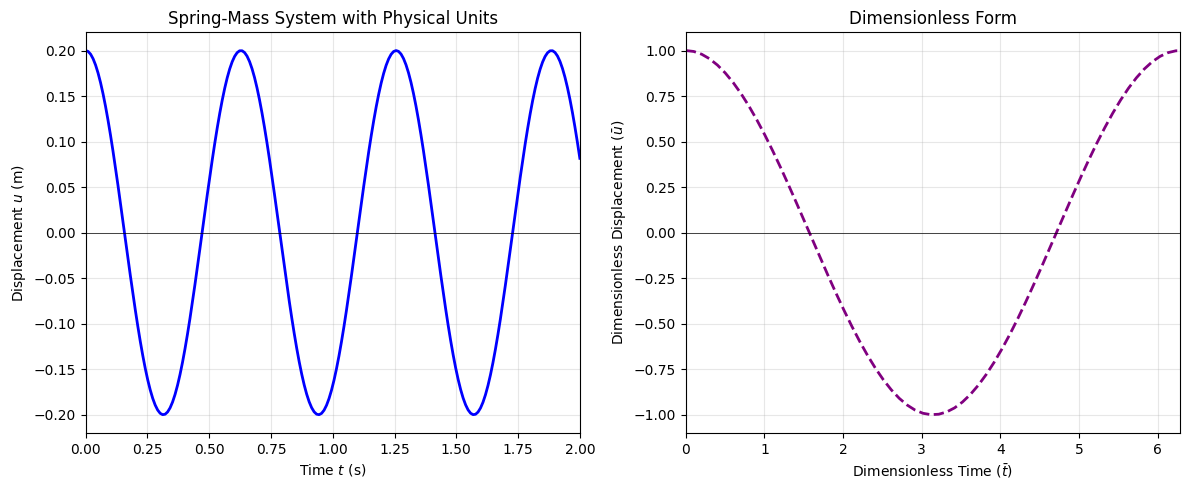

In [14]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dimension
axes[0].plot(t, u, color='blue', linewidth=2)
axes[0].set_title(f'Spring-Mass System with Physical Units')
axes[0].set_xlabel('Time $t$ (s)')
axes[0].set_ylabel('Displacement $u$ (m)')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].set_xlim(0, 2)

# Dimensionless 
axes[1].plot(t_bar, u_bar, color='purple', linewidth=2, linestyle='--')
axes[1].set_title(r'Dimensionless Form')
axes[1].set_xlabel(r'Dimensionless Time ($\bar{t}$)')
axes[1].set_ylabel(r'Dimensionless Displacement ($\bar{u})$')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].set_xlim(0, 2 * np.pi)

plt.tight_layout()
plt.show()

## Heat Equation

### Properties & Calculations

In [15]:
# function: exact heat solution for 1D steady-state conduction with internal heat generation
def exact_heat_solution(x, L, kappa, s, T_left, T_right):
    C2 = T_left
    C1 = (T_right - T_left) / L + (s * L) / (2 * kappa)
    return -(s / (2 * kappa)) * x**2 + C1 * x + C2

# properties
L = 0.5           # Length (m)
kappa = 200.0     # Thermal Conductivity (W/m·K)
s = 50000.0       # Heat Source (W/m^3)
T_left = 300.0    # Left Temp (K)
T_right = 350.0   # Right Temp (K)
T0 = T_left       # Reference Temp (usually the initial or boundary temp)

x = np.linspace(0, L, 100) # Spatial domain
T = exact_heat_solution(x, L, kappa, s, T_left, T_right) # Dimensional temperature profile

# Calculate the dimensionless groups derived in your notes
x_bar = x / L
T_bar = T / T0

# dimensionless source (s_bar) calculation
s_bar_val = (s * L**2) / (kappa * T0)

### Visualization

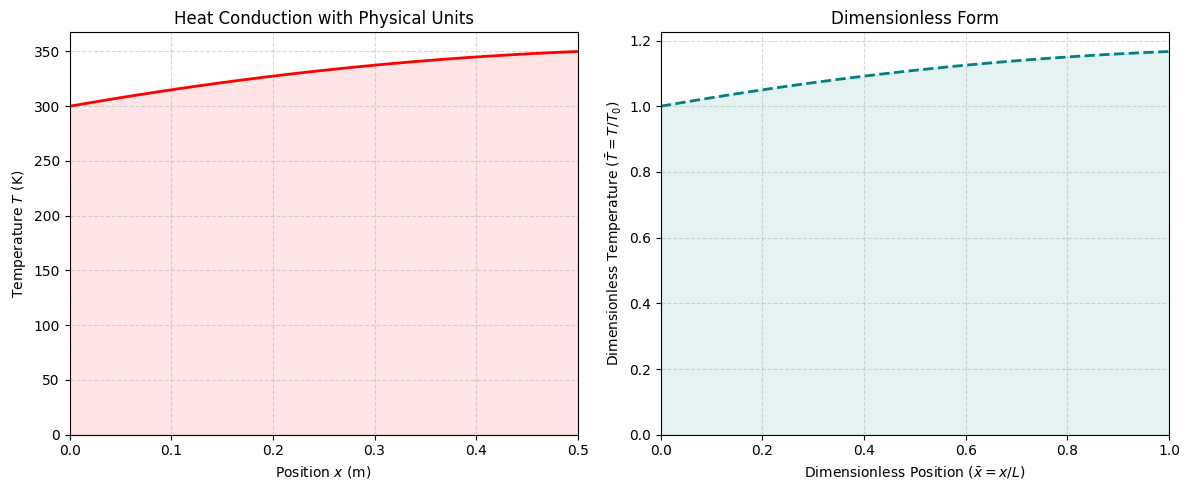

In [17]:
# --- 3. Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dimensions
axes[0].plot(x, T, color='red', linewidth=2)
axes[0].fill_between(x, T, color='red', alpha=0.1)
axes[0].set_title(f'Heat Conduction with Physical Units')
axes[0].set_xlabel('Position $x$ (m)')
axes[0].set_ylabel('Temperature $T$ (K)')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_xlim(0, L)
axes[0].set_ylim(0,)

# Dimensionless 
axes[1].plot(x_bar, T_bar, color='teal', linewidth=2, linestyle='--')
axes[1].fill_between(x_bar, T_bar, color='teal', alpha=0.1)
axes[1].set_title(rf'Dimensionless Form')
axes[1].set_xlabel(r'Dimensionless Position ($\bar{x} = x/L$)')
axes[1].set_ylabel(r'Dimensionless Temperature ($\bar{T} = T/T_0$)')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0,)

plt.tight_layout()
plt.show()

**Note:**

The side-by-side plots above illustrate a fundamental concept in engineering analysis: **Universality**.

1.  **Identical Physics:** The shape of the curve on the left (Dimensional) is mathematically identical to the shape on the right (Dimensionless). Nondimensionalization is simply a "coordinate transformation" or a re-labeling of the axes.

2.  **The "Master Curve":** The plot on the right is a **Master Curve**.
    * If you solve the spring equation $\bar{u}'' = -\bar{u}$ just **once**, you have the solution for *every possible linear spring* in the universe.
    * To find the specific behavior of a 10kg mass or a 0.001g MEMS device, you simply multiply the master curve by the appropriate scaling factors ($u_0$ and $\omega_n$).

3.  **Parameter Reduction:**
    * In the dimensional heat problem, we had 5 parameters: $L, \kappa, \rho, c_v, s$.
    * In the dimensionless form, these collapsed into a single group $\bar{s}$.
    * This tells us that two systems with completely different materials (e.g., copper vs. wood) will behave **exactly the same** if their dimensionless group $\bar{s}$ is the same.

<div style="font-family: Arial, sans-serif; font-size: 10pt; color: #333F48; border-top: 1px solid #ccc; padding-top: 10px; margin-top: 20px;">
    <span style="font-weight: bold; color: #bf5700; text-transform: uppercase;">Syed Talha Tirmizi</span>, PhD Student <br>
    The University of Texas at Austin | Hildebrand Department of Petroleum & Geosystem Engineering | <a href="syedtalha.tirmizi@austin.utexas.edu" style="color: #bf5700; text-decoration: none;">syedtalha.tirmizi@austin.utexas.edu</a>
</div>